In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sab
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [3]:
datapath = "D:/PYTHON/2.datasets/heart.csv"
print(datapath)

heartdf = pd.read_csv(datapath)

print (heartdf)

D:/PYTHON/2.datasets/heart.csv
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
917   59    1   1       140   221    0        1      164      1      0.0   
918   60    1   0       125   258    0        0      141      1      2.8   
919   47    1   0       110   275    0        0      118      1      1.0   
920   50    0   0       110   254    0        0      159      0      0.0   
921   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3     

In [4]:
heartdf.shape

heartdf.count()

heartdf.describe()

heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       922 non-null    int64  
 1   sex       922 non-null    int64  
 2   cp        922 non-null    int64  
 3   trestbps  922 non-null    int64  
 4   chol      922 non-null    int64  
 5   fbs       922 non-null    int64  
 6   restecg   922 non-null    int64  
 7   thalach   922 non-null    int64  
 8   exang     922 non-null    int64  
 9   oldpeak   922 non-null    float64
 10  slope     922 non-null    int64  
 11  ca        922 non-null    int64  
 12  thal      922 non-null    int64  
 13  target    922 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.0 KB


In [5]:
#checking for any nullo data set

heartdf.isna().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

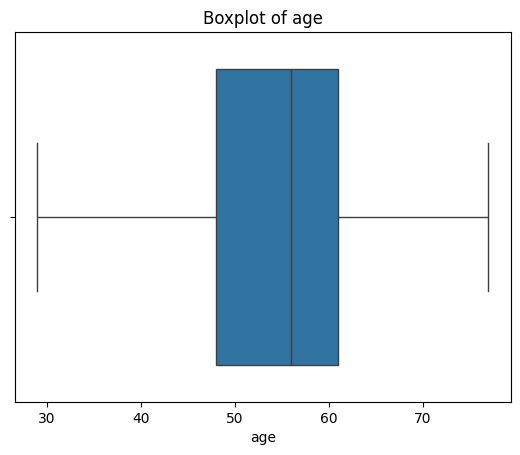

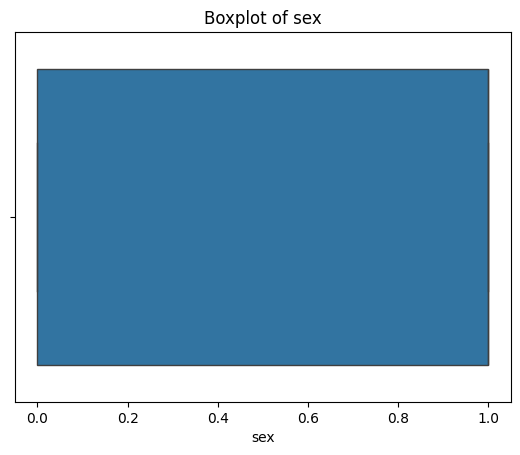

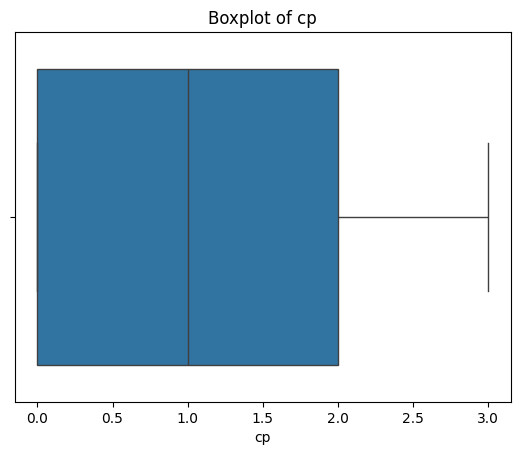

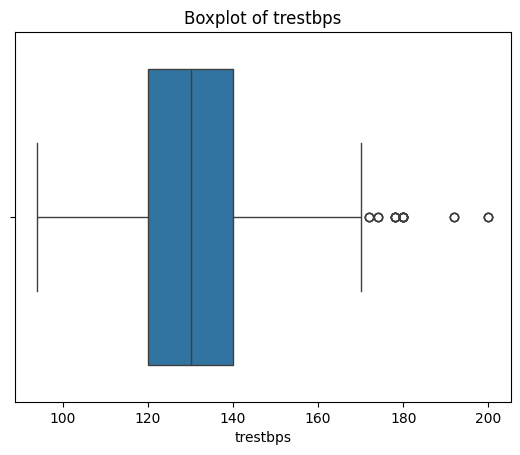

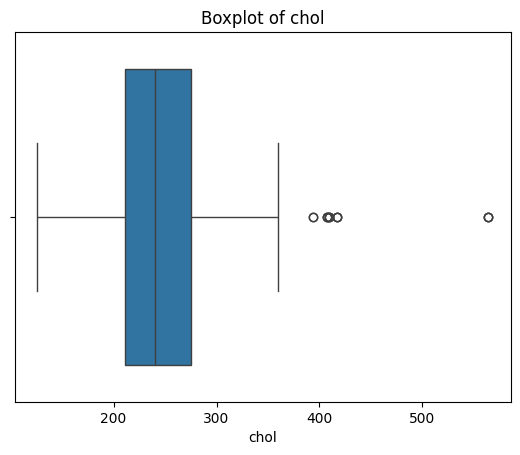

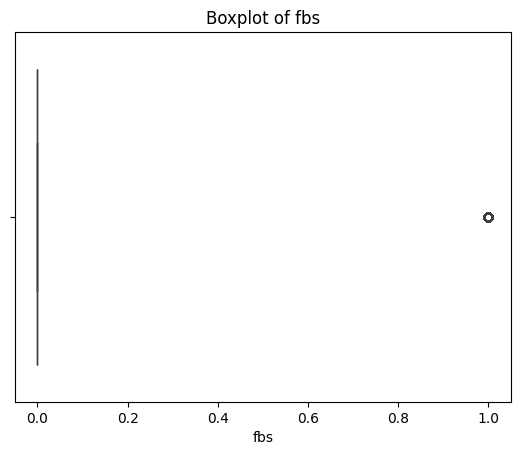

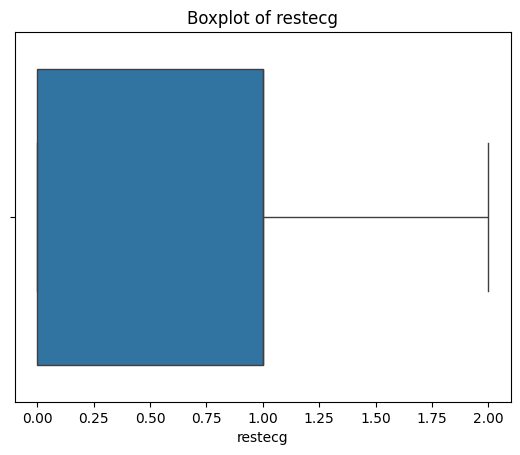

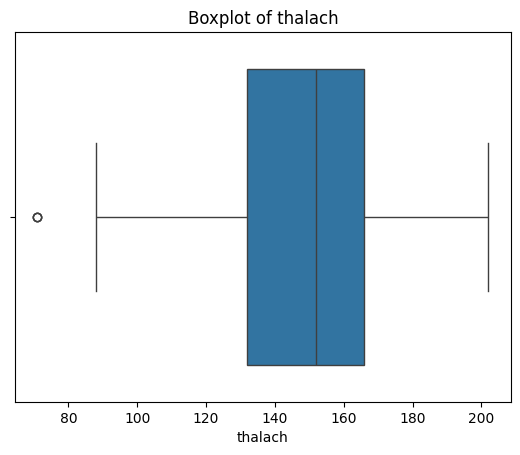

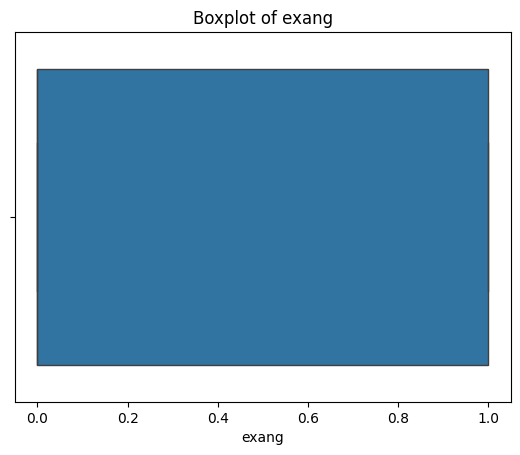

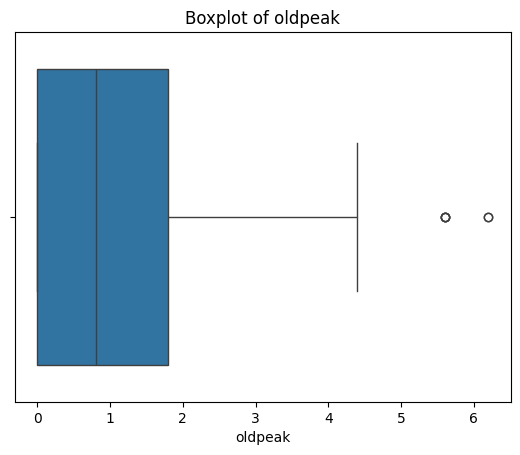

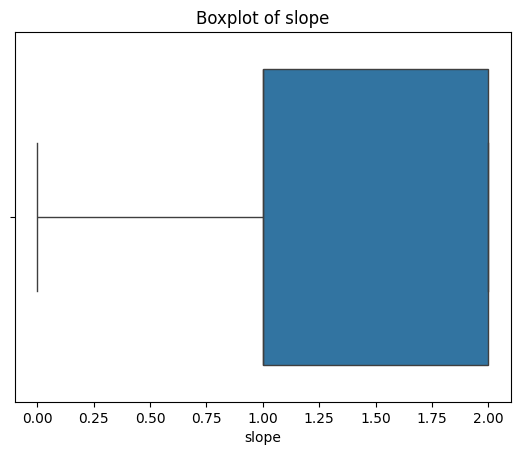

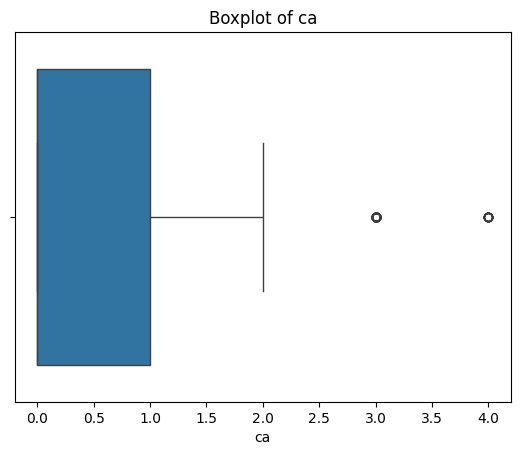

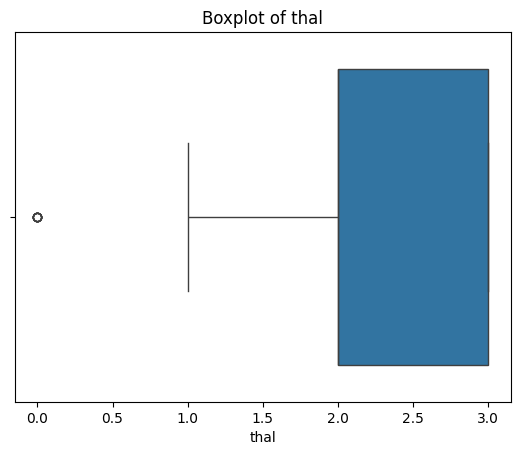

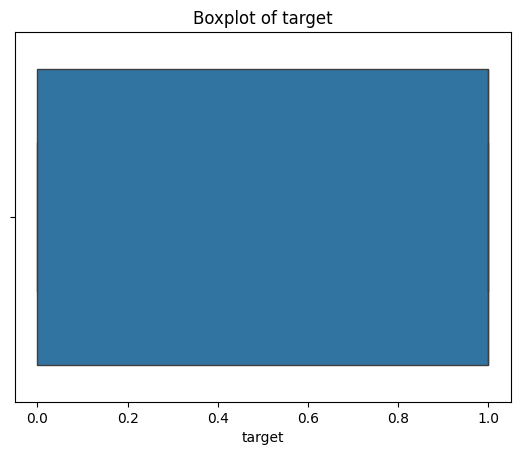

In [6]:
#checking too much lage data tha exists 

for i in heartdf.columns:
    plt.figure()  # Create a new figure for each column
    sab.boxplot(x=heartdf[i])  
    plt.title(f'Boxplot of {i}')
    plt.show()

In [7]:
heartdfcopy = heartdf.copy()   #made a copy of data



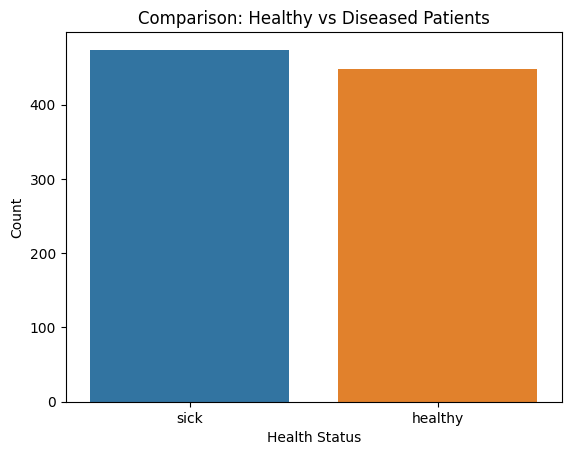

In [8]:
#COMPARING HEALTHY VS DISEASED

heartdfcopy.target = heartdfcopy.target.map({0:'healthy' ,1:'sick'})
sab.countplot(x="target", data=heartdfcopy,hue=heartdfcopy.target)
plt.title('Comparison: Healthy vs Diseased Patients')
plt.xlabel('Health Status')
plt.ylabel('Count')


plt.show()

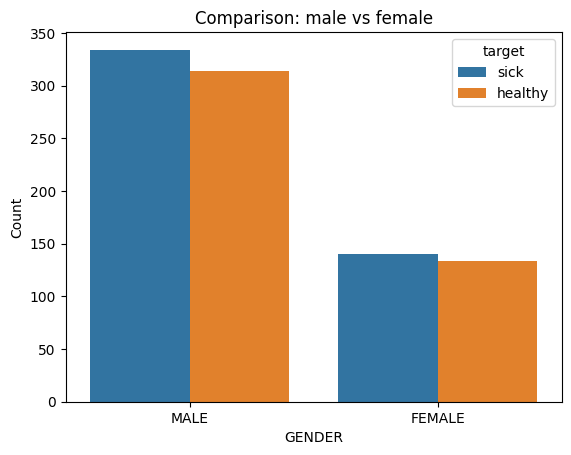

In [9]:
#COMPARING male vs female

heartdfcopy.sex = heartdfcopy.sex.map({0:'FEMALE' ,1:'MALE'})
sab.countplot(x="sex", data=heartdfcopy, hue=heartdfcopy.target)
plt.title('Comparison: male vs female')
plt.xlabel('GENDER')
plt.ylabel('Count')


plt.show()

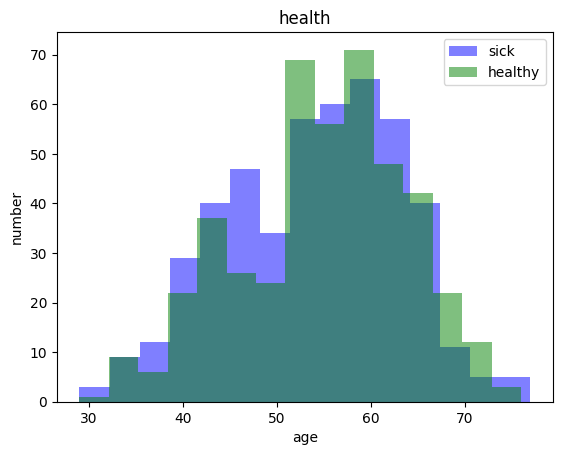

In [10]:
plt.hist(heartdfcopy[heartdfcopy.target=='sick']['age'],color='b',alpha=0.5,bins=15,label='sick')
plt.hist(heartdfcopy[heartdfcopy.target=='healthy']['age'],color='g',alpha=0.5,bins=15,label='healthy')
plt.title('health')
plt.xlabel('age')
plt.ylabel('number')
plt.legend()
plt.show()


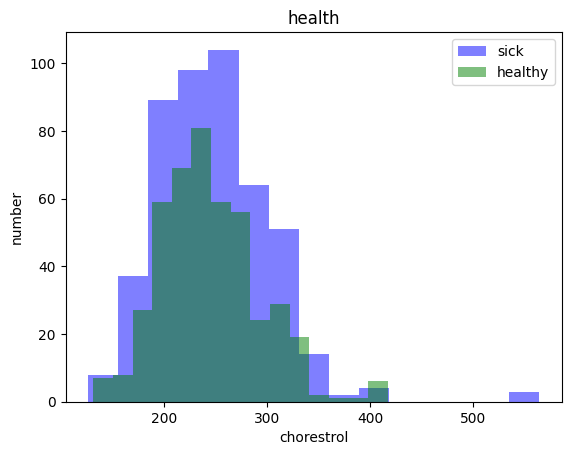

In [11]:
#compare chorestrol and health
plt.hist(heartdfcopy[heartdfcopy.target=='sick']['chol'],color='b',alpha=0.5,bins=15,label='sick')
plt.hist(heartdfcopy[heartdfcopy.target=='healthy']['chol'],color='g',alpha=0.5,bins=15,label='healthy')
plt.title('health')
plt.xlabel('chorestrol')
plt.ylabel('number')
plt.legend()
plt.show()


In [12]:
################################################################
########################### keras sequential model ############
###############################################################

In [13]:
x = heartdfcopy.drop('target',axis=1)
y = heartdfcopy['target']
x = x.drop('sex',axis=1)
xsex = heartdfcopy['sex']


print(x)
print(y)
print(xsex)


xsex = heartdfcopy['sex'].map({'FEMALE': 0, 'MALE': 1})


y = heartdfcopy['target'].map({'healthy': 0, 'sick': 1})

x['sex'] = xsex

print(x)

print(y)


     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     52   0       125   212    0        1      168      0      1.0      2   
1     53   0       140   203    1        0      155      1      3.1      0   
2     70   0       145   174    0        1      125      1      2.6      0   
3     61   0       148   203    0        1      161      0      0.0      2   
4     62   0       138   294    1        1      106      0      1.9      1   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
917   59   1       140   221    0        1      164      1      0.0      2   
918   60   0       125   258    0        0      141      1      2.8      1   
919   47   0       110   275    0        0      118      1      1.0      1   
920   50   0       110   254    0        0      159      0      0.0      2   
921   54   0       120   188    0        1      113      0      1.4      1   

     ca  thal  
0     2     3  
1     0     3  
2     0     3  

In [44]:
#using default activation function (define model)

model = keras.Sequential()
model.add(layers.Dense(8, activation ='relu',input_dim=13))
model.add(layers.Dropout(0.3))  # Randomly drop 30% of units

model.add(layers.Dense(1, activation ='sigmoid'))


#sumarize layer 

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])

history = model.fit(x,y, validation_split=0.2,batch_size=32,epochs=150)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5957 - loss: 13.0057 - val_accuracy: 0.0162 - val_loss: 20.5262
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5482 - loss: 8.6919 - val_accuracy: 0.1297 - val_loss: 12.2198
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5509 - loss: 7.7270 - val_accuracy: 0.0919 - val_loss: 12.0926
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5658 - loss: 6.6871 - val_accuracy: 0.1351 - val_loss: 10.6408
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5400 - loss: 6.0567 - val_accuracy: 0.1676 - val_loss: 8.4193
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5427 - loss: 4.8256 - val_accuracy: 0.1838 - val_loss: 6.8832
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5346 - loss: 4.1851 - val_accuracy: 0.2378 - val_loss: 5.1413
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5319 - loss: 2.9694 - val_accuracy: 0.22

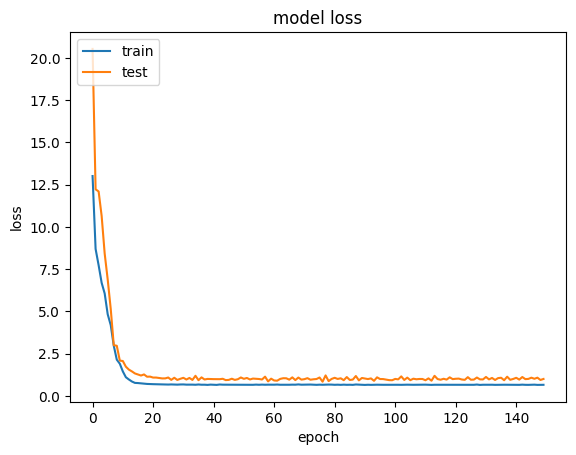

In [46]:
#step7 visalize and prediction 

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')

plt.show()


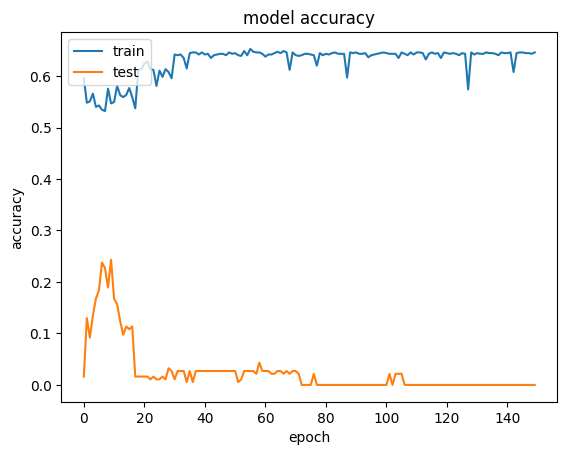

In [47]:
#step7 visalize and prediction 

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')

plt.show()


In [48]:
import numpy 

from numpy import array




xnew = array([[67,      # AGE
               1,      # SEX
               0,      # CP
               125,    # TRESTBPS
               254,    # CHOLESTROL
               1,       # FBS
               1,       # RESTECG
               163,       # THALACH
               0,       # EXANG
               0.2,       # OLDPEAK
               1,    # sLOPE
               2,       # CA
               3    # THAL
              
               ]])


#converting the data into float data for the system to analyze easily

xnew = numpy.array(xnew,dtype=numpy.float64)

#predication model
ynew = (model.predict(xnew)>0.5).astype("int32")

print(ynew[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0]


In [49]:
#testing
datapath = "D:/PYTHON/2.datasets/hearttestr.csv"
print(datapath)

heartdf = pd.read_csv(datapath)

print (heartdf)

D:/PYTHON/2.datasets/hearttestr.csv
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     48    1   1       110   229    0        1      168      0      1.0   
1     57    1   2       150   126    1        1      173      0      0.2   
2     57    1   0       165   289    1        0      124      0      1.0   
3     57    1   2       128   229    0        0      150      0      0.4   
4     39    1   2       140   321    0        0      182      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
98    34    1   3       118   182    0        0      174      0      0.0   
99    44    1   0       112   290    0        0      153      0      0.0   
100   60    1   0       125   258    0        0      141      1      2.8   
101   43    1   0       150   247    0        1      171      0      1.5   
102   52    1   3       152   298    1        1      178      0      1.2   

     slope  ca  thal  target  
0        0   0     3

In [50]:
print(x)
print(y)



     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     52   0       125   212    0        1      168      0      1.0      2   
1     53   0       140   203    1        0      155      1      3.1      0   
2     70   0       145   174    0        1      125      1      2.6      0   
3     61   0       148   203    0        1      161      0      0.0      2   
4     62   0       138   294    1        1      106      0      1.9      1   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
917   59   1       140   221    0        1      164      1      0.0      2   
918   60   0       125   258    0        0      141      1      2.8      1   
919   47   0       110   275    0        0      118      1      1.0      1   
920   50   0       110   254    0        0      159      0      0.0      2   
921   54   0       120   188    0        1      113      0      1.4      1   

     ca  thal  sex  
0     2     3    1  
1     0     3    1  


In [54]:
evaluation_history = model.evaluate(x,y)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5152 - loss: 0.7182 
